<a href="https://colab.research.google.com/github/ShrutiChrist/Predictive-Analysis/blob/main/2348545_PA_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Target'] = housing_data.target  # Add target (median house value)

# Display the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset summary statistics:")
print(df.describe())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.0000

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


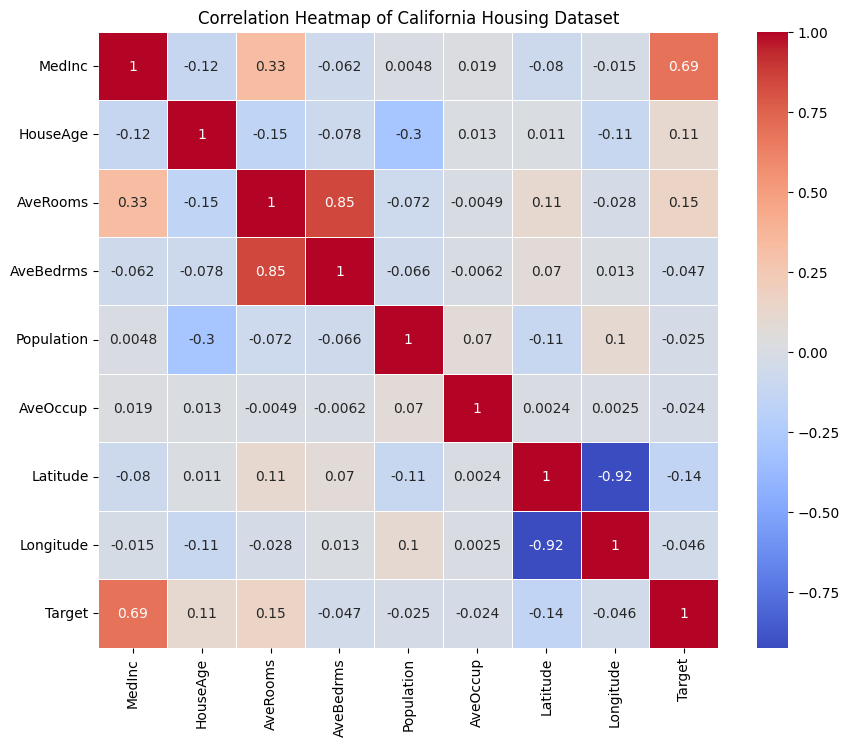

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of California Housing Dataset")
plt.show()

A correlation heatmap visually represents the strength and direction of relationships between features and the target variable.
The variable MedInc (Median Income) is usually highly correlated with Target (house value), while other features may show weaker relationships.

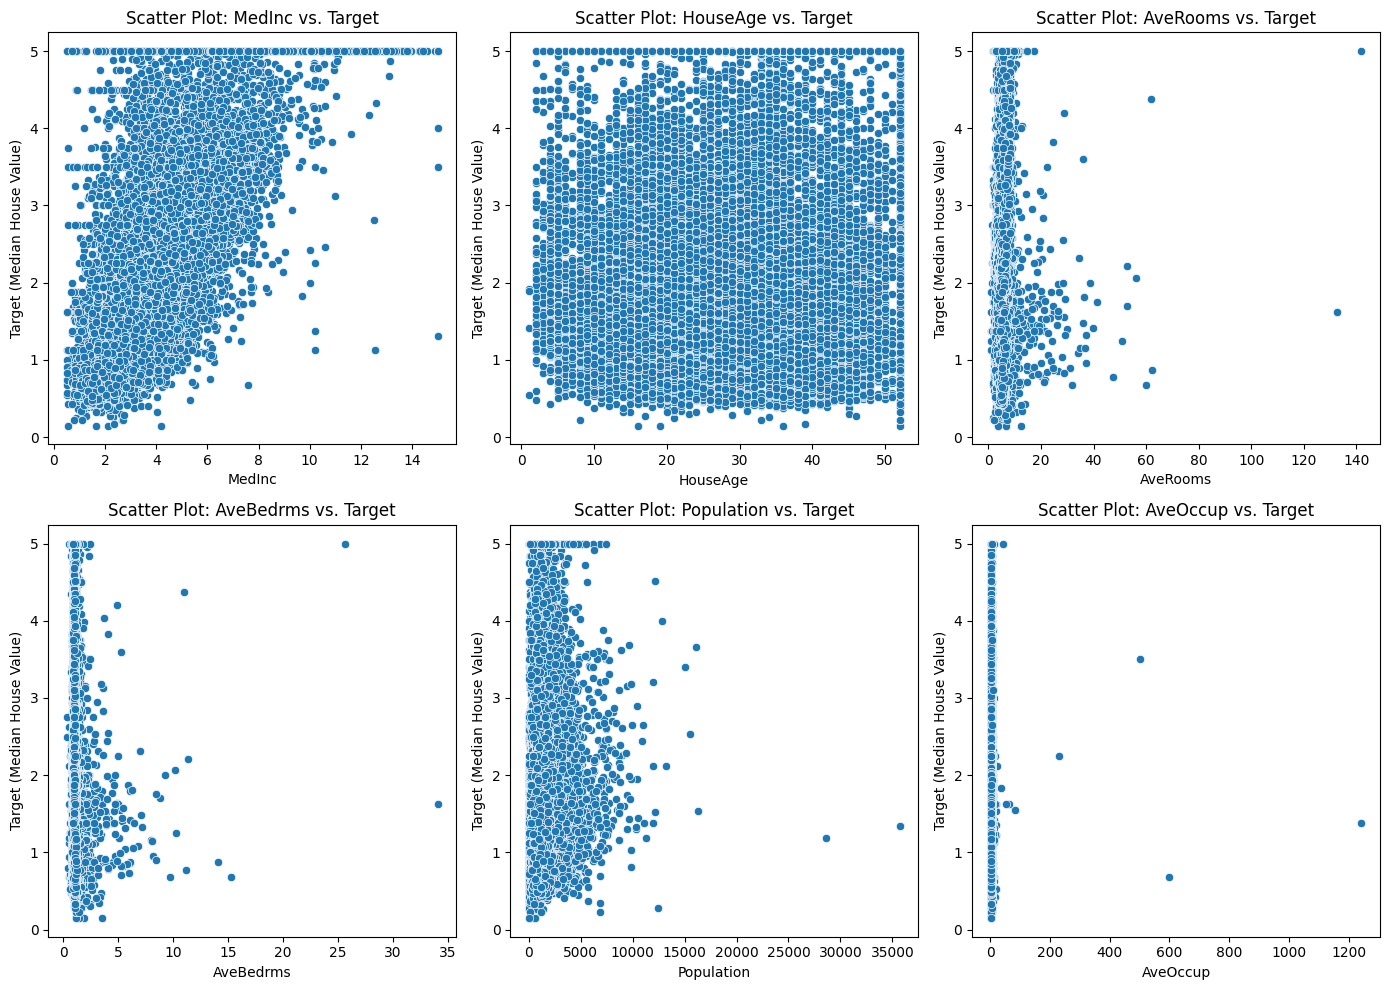

In [ ]:
# Scatter plots to explore relationships with the target
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Target'])
    plt.title(f'Scatter Plot: {feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Target (Median House Value)')

plt.tight_layout()
plt.show()

Scatter plots show the individual relationships between features like MedInc, HouseAge, and AveRooms with the target variable. MedInc tends to have a positive relationship with Target, meaning higher median income generally corresponds to higher house prices.

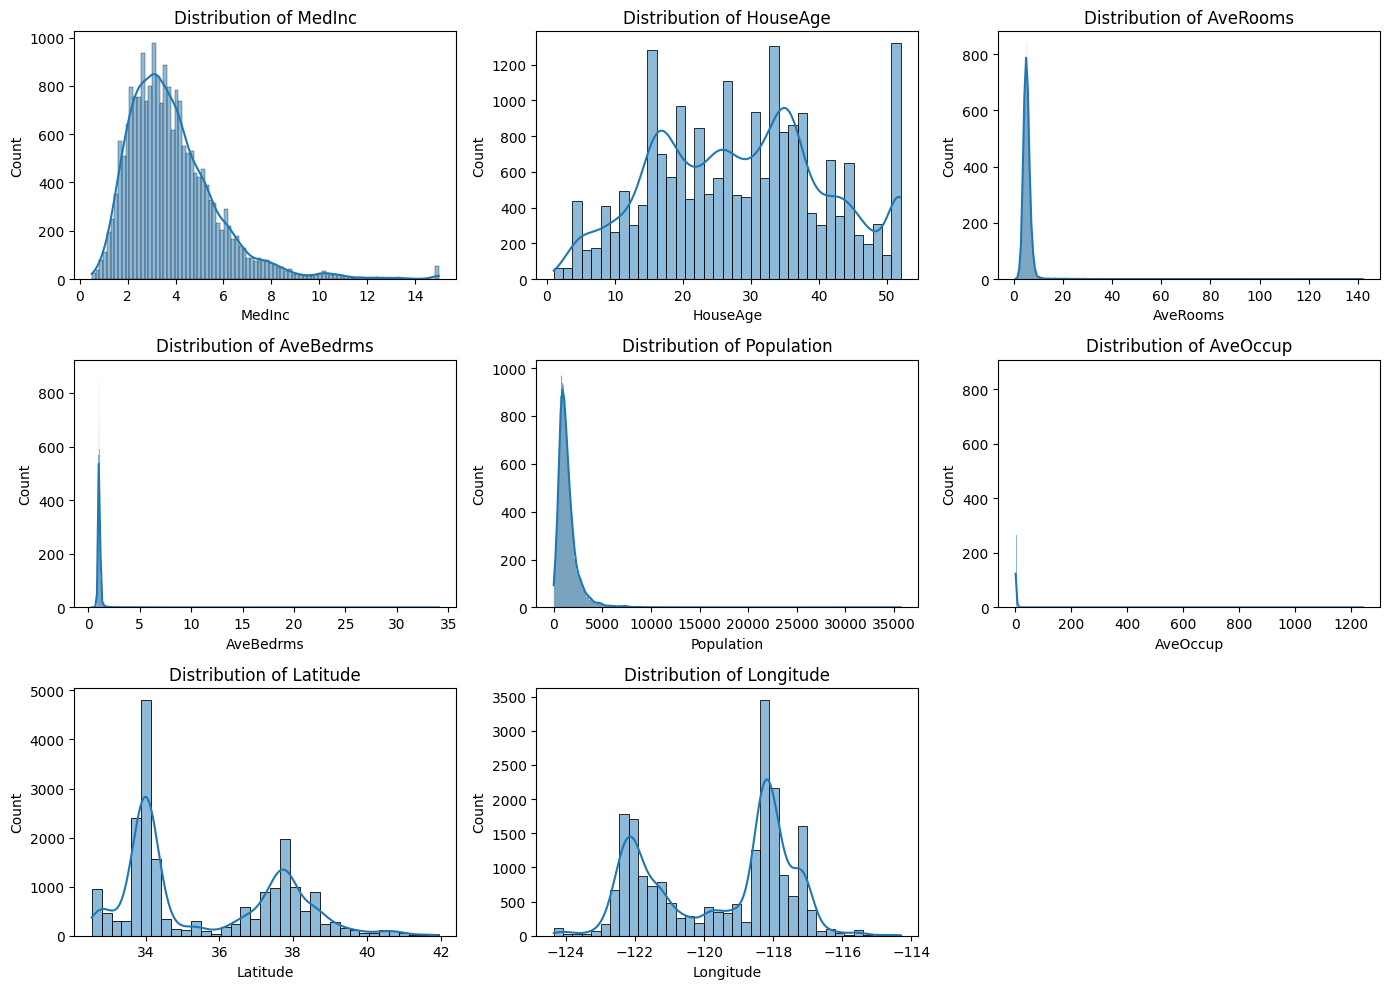

In [ ]:
# Histograms to check the distribution of features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Histograms reveal the distribution of each feature in the dataset. Features like HouseAge might be skewed, indicating that most houses in the dataset are relatively old or new.

In [ ]:
# Normalize the features using StandardScaler
X = df.drop(columns='Target')
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")

In [ ]:
# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
evaluate_model(y_test, y_pred_linear, "Multiple Linear Regression")

Multiple Linear Regression Performance:
Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511



Mean Squared Error (MSE): The average difference between the predicted house prices and the actual prices is somewhat large, meaning the model's predictions are not as close as we would like.

R-squared (R²): The model explains about 57.6% of the changes in house prices, which means it's capturing over half of the important patterns but missing the rest.

In [ ]:
# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Default alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression Performance:
Mean Squared Error: 0.5558512007367514
R-squared: 0.575818534544132



Mean Squared Error (MSE): 0.5559, indicates that, similar to the Multiple Linear Regression model, the average squared error between the predicted and actual house prices is around 0.5559. This suggests that the predictions are only slightly better than the multiple linear regression model.

R-squared (R²): 0.5758 is almost identical to the Multiple Linear Regression model, meaning that about 57.6% of the variability in house prices is explained by this Ridge Regression model. This shows that the regularization doesn't significantly change the model's performance.

Ridge Regression, with the default regularization strength (alpha = 1.0), provides nearly the same performance as the standard linear regression model. While regularization helps in controlling overfitting, in this case, the dataset may not have suffered from overfitting, so the performance remains largely unchanged.

In [ ]:
# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # Default alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression Performance:
Mean Squared Error: 0.6795515190149223
R-squared: 0.4814202815313765



Mean Squared Error (MSE): 0.6796, indicates that the Lasso model’s predictions deviate more from the actual house prices compared to both the Multiple Linear Regression and Ridge Regression models. This higher error suggests that the Lasso model is not performing as well in predicting house prices.

R-squared (R²): 0.4814 means that the Lasso model explains about 48.1% of the variability in house prices. This is lower than the R² values for the other models, indicating that Lasso Regression is less effective at capturing the relationships between the features and the target variable.

Lasso Regression, with the given alpha (0.1), performs worse compared to both Multiple Linear Regression and Ridge Regression.

In [ ]:
# Ridge Regression Hyperparameter Tuning using GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Range of alpha values
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_model = ridge_grid.best_estimator_
print(f"Best Ridge alpha: {best_ridge_alpha}")
y_pred_ridge_tuned = best_ridge_model.predict(X_test)
evaluate_model(y_test, y_pred_ridge_tuned, "Tuned Ridge Regression")

Best Ridge alpha: 1
Tuned Ridge Regression Performance:
Mean Squared Error: 0.5558512007367514
R-squared: 0.575818534544132



Tuning the alpha parameter for Ridge Regression using GridSearchCV resulted in selecting the same alpha value (1.0) as the default. The performance metrics (MSE and R²) remained unchanged, suggesting that the initial choice of alpha was already close to optimal.

In [ ]:
# Lasso Regression Hyperparameter Tuning using GridSearchCV
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Range of alpha values
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso_model = lasso_grid.best_estimator_
print(f"Best Lasso alpha: {best_lasso_alpha}")
y_pred_lasso_tuned = best_lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_lasso_tuned, "Tuned Lasso Regression")

Best Lasso alpha: 0.001
Tuned Lasso Regression Performance:
Mean Squared Error: 0.5544062174455687
R-squared: 0.5769212309657655



Tuning the alpha for Lasso Regression improved performance:

MSE decreased compared to the initial Lasso model.

R² increased, meaning the model now explains about 57.7% of the variance.

The tuned Lasso model performs slightly better than both the initial Lasso and the Ridge models.

In [ ]:
# Compare all results
print(f"Original Ridge alpha (1.0), R²: {r2_score(y_test, y_pred_ridge)}")
print(f"Best Ridge alpha ({best_ridge_alpha}), R²: {r2_score(y_test, y_pred_ridge_tuned)}")

print(f"Original Lasso alpha (0.1), R²: {r2_score(y_test, y_pred_lasso)}")
print(f"Best Lasso alpha ({best_lasso_alpha}), R²: {r2_score(y_test, y_pred_lasso_tuned)}")

Original Ridge alpha (1.0), R²: 0.575818534544132
Best Ridge alpha (1), R²: 0.575818534544132
Original Lasso alpha (0.1), R²: 0.4814202815313765
Best Lasso alpha (0.001), R²: 0.5769212309657655


Ridge Regression:

Original Alpha (1.0), R²: 0.5758

Best Alpha (1), R²: 0.5758

Tuning did not improve performance; the model explains about 57.6% of the variance in house prices.

Lasso Regression:

Original Alpha (0.1), R²: 0.4814

Best Alpha (0.001), R²: 0.5769

Tuning significantly improved performance; the model now explains about 57.7% of the variance, outperforming the original Lasso model.
